In [29]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spc = pd.read_csv(r"C:\Users\Username\OneDrive\Desktop\Invesco_project\data\^GSPC_mon.csv", nrows=239)
spe = pd.read_csv(r"C:\Users\Username\OneDrive\Desktop\Invesco_project\data\RSP_mon.csv", nrows =239)

In [3]:
spc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    239 non-null    object 
 1   Close   239 non-null    float64
 2   High    239 non-null    float64
 3   Low     239 non-null    float64
 4   Open    239 non-null    float64
 5   Volume  239 non-null    float64
dtypes: float64(5), object(1)
memory usage: 11.3+ KB


In [4]:
spc

,Date,Close,High,Low,Open,Volume
0,6/1/2005,1191.329956,1219.589966,1188.300049,1191.500000,4.033404e+10
1,7/1/2005,1234.180054,1245.150024,1183.550049,1191.329956,3.746467e+10
2,8/1/2005,1220.329956,1245.859985,1201.069946,1234.180054,4.203009e+10
3,9/1/2005,1228.810059,1243.130005,1205.349976,1220.329956,4.477751e+10
4,10/1/2005,1207.010010,1233.339966,1168.199951,1228.810059,4.979379e+10
...,...,...,...,...,...,...
234,12/1/2024,5881.629883,6099.970215,5832.299805,6040.109863,8.606490e+10
235,1/1/2025,6040.529785,6128.180176,5773.310059,5903.259766,8.863938e+10
236,2/1/2025,5954.500000,6147.430176,5837.660156,5969.649902,9.231700e+10
237,3/1/2025,5611.850098,5986.089844,5488.729980,5968.330078,1.113870e+11


In [5]:
spc["Date"] = pd.to_datetime(spc["Date"])

In [6]:
spe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    239 non-null    object 
 1   Close   239 non-null    float64
 2   High    239 non-null    float64
 3   Low     239 non-null    float64
 4   Open    239 non-null    float64
 5   Volume  239 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 11.3+ KB


In [7]:
spe

,Date,Close,High,Low,Open,Volume
0,6/1/2005,28.401981,28.941376,28.063038,28.064859,7683600
1,7/1/2005,29.924267,30.147116,28.344208,28.568886,4635200
2,8/1/2005,29.663055,30.147118,29.043819,29.993680,7580800
3,9/1/2005,29.732468,30.161730,28.897685,29.610082,6633200
4,10/1/2005,29.012419,29.942809,27.977633,29.816437,13579600
...,...,...,...,...,...,...
234,12/1/2024,173.780304,186.315732,172.134049,186.147140,136653900
235,1/1/2025,180.373642,182.354120,171.555994,175.477162,165748300
236,2/1/2025,179.318695,182.145131,176.661460,178.064724,147981100
237,3/1/2025,172.401916,180.532860,168.032902,180.015357,190015000


In [8]:
spe["Date"] = pd.to_datetime(spe["Date"])

In [9]:
ff5 = pd.read_csv(r"C:\Users\Username\OneDrive\Desktop\Invesco_project\F-F_Research_Data_5_Factors_2x3.csv", skiprows =3, nrows =742)

In [10]:
ff5

,Unnamed: 0,Mkt-RF,SMB,HML,RMW,CMA,RF
0,196307,-0.39,-0.48,-0.81,0.64,-1.15,0.27
1,196308,5.08,-0.80,1.70,0.40,-0.38,0.25
2,196309,-1.57,-0.43,0.00,-0.78,0.15,0.27
3,196310,2.54,-1.34,-0.04,2.79,-2.25,0.29
4,196311,-0.86,-0.85,1.73,-0.43,2.27,0.27
...,...,...,...,...,...,...,...
737,202412,-3.15,-3.84,-3.00,1.91,-1.21,0.37
738,202501,2.80,-1.22,1.62,-2.33,-3.24,0.37
739,202502,-2.43,-4.93,4.91,1.09,3.06,0.33
740,202503,-6.39,-1.49,2.90,2.11,-0.47,0.34


In [11]:
ff5.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

ff5["Date"] = pd.to_datetime(ff5["Date"], format="%Y%m")

ff5.set_index("Date", inplace=True)

ff5 = ff5.astype(float) / 100
ff5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-01,-0.0039,-0.0048,-0.0081,0.0064,-0.0115,0.0027
1963-08-01,0.0508,-0.0080,0.0170,0.0040,-0.0038,0.0025
1963-09-01,-0.0157,-0.0043,0.0000,-0.0078,0.0015,0.0027
1963-10-01,0.0254,-0.0134,-0.0004,0.0279,-0.0225,0.0029
1963-11-01,-0.0086,-0.0085,0.0173,-0.0043,0.0227,0.0027
...,...,...,...,...,...,...
2024-12-01,-0.0315,-0.0384,-0.0300,0.0191,-0.0121,0.0037
2025-01-01,0.0280,-0.0122,0.0162,-0.0233,-0.0324,0.0037
2025-02-01,-0.0243,-0.0493,0.0491,0.0109,0.0306,0.0033


In [12]:
ffm = pd.read_csv(r"C:\Users\Username\OneDrive\Desktop\Invesco_project\F-F_Momentum_Factor.csv",skiprows= 13, nrows = 1180)

In [13]:
ffm

,Unnamed: 0,Mom
0,192701,0.57
1,192702,-1.50
2,192703,3.52
3,192704,4.36
4,192705,2.78
...,...,...
1175,202412,-0.30
1176,202501,0.95
1177,202502,-0.82
1178,202503,-2.82


In [14]:
ffm.rename(columns={"Unnamed: 0": "Date"}, inplace=True)

ffm["Date"] = pd.to_datetime(ffm["Date"], format="%Y%m")

ffm.set_index("Date", inplace=True)

ffm = ffm.astype(float) / 100
ffm

,Mom
Date,
1927-01-01,0.0057
1927-02-01,-0.0150
1927-03-01,0.0352
1927-04-01,0.0436
1927-05-01,0.0278
...,...
2024-12-01,-0.0030
2025-01-01,0.0095
2025-02-01,-0.0082


In [15]:
ff = ff5.join(ffm, how="inner")
ff

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,
1963-07-01,-0.0039,-0.0048,-0.0081,0.0064,-0.0115,0.0027,0.0101
1963-08-01,0.0508,-0.0080,0.0170,0.0040,-0.0038,0.0025,0.0100
1963-09-01,-0.0157,-0.0043,0.0000,-0.0078,0.0015,0.0027,0.0012
1963-10-01,0.0254,-0.0134,-0.0004,0.0279,-0.0225,0.0029,0.0313
1963-11-01,-0.0086,-0.0085,0.0173,-0.0043,0.0227,0.0027,-0.0078
...,...,...,...,...,...,...,...
2024-12-01,-0.0315,-0.0384,-0.0300,0.0191,-0.0121,0.0037,-0.0030
2025-01-01,0.0280,-0.0122,0.0162,-0.0233,-0.0324,0.0037,0.0095
2025-02-01,-0.0243,-0.0493,0.0491,0.0109,0.0306,0.0033,-0.0082


In [16]:
fff = ff.loc["2005-06":"2025-06"]
fff

,Mkt-RF,SMB,HML,RMW,CMA,RF,Mom
Date,,,,,,,
2005-06-01,0.0058,0.0326,0.0280,0.0087,-0.0052,0.0023,0.0207
2005-07-01,0.0392,0.0276,-0.0078,-0.0119,-0.0078,0.0024,0.0003
2005-08-01,-0.0120,-0.0094,0.0134,-0.0196,0.0038,0.0030,0.0207
2005-09-01,0.0048,-0.0031,0.0078,0.0026,-0.0061,0.0029,0.0346
2005-10-01,-0.0204,-0.0150,0.0043,-0.0070,-0.0126,0.0027,-0.0119
...,...,...,...,...,...,...,...
2024-12-01,-0.0315,-0.0384,-0.0300,0.0191,-0.0121,0.0037,-0.0030
2025-01-01,0.0280,-0.0122,0.0162,-0.0233,-0.0324,0.0037,0.0095
2025-02-01,-0.0243,-0.0493,0.0491,0.0109,0.0306,0.0033,-0.0082


In [17]:
spc.set_index("Date", inplace=True)
spe.set_index("Date", inplace=True)

In [18]:
spc_ret = spc["Close"].pct_change()
spe_ret = spe["Close"].pct_change()

spread_ret = spc_ret - spe_ret
spread_ret.name = "Spread"

fff, spread_ret = fff.align(spread_ret, join="inner", axis=0)

In [21]:
print(spread_ret.head())
print(spread_ret.index)


Date
2005-06-01       NaN
2005-07-01   -0.0176
2005-08-01   -0.0025
2005-09-01    0.0046
2005-10-01    0.0065
Name: Spread, dtype: float64
DatetimeIndex(['2005-06-01', '2005-07-01', '2005-08-01', '2005-09-01',
               '2005-10-01', '2005-11-01', '2005-12-01', '2006-01-01',
               '2006-02-01', '2006-03-01',
               ...
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01',
               '2025-03-01', '2025-04-01'],
              dtype='datetime64[ns]', name='Date', length=239, freq=None)


In [22]:
spread_ret = spread_ret.dropna()
fff, spread_ret = fff.align(spread_ret, join="inner", axis=0)

In [32]:
results = []

for factor in fff.columns:
    X = sm.add_constant(fff[[factor]])
    model = sm.OLS(spread_ret, X).fit()
    
    residuals = model.resid
    semi_dev = np.std(residuals[residuals < 0]) 
    alpha = model.params.get("const", np.nan)
    
    sortino = alpha / semi_dev if semi_dev != 0 else np.nan

    results.append({
        "Factor": factor,
        "Alpha": alpha,
        "Beta": model.params.get(factor, np.nan),
        "p_alpha": model.pvalues.get("const", np.nan),
        "p_beta": model.pvalues.get(factor, np.nan),
        "R_squared": model.rsquared,
        "Semi_Deviation": semi_dev,
        "Sortino_Ratio": sortino
    })


reg_summary = pd.DataFrame(results)
reg_summary.sort_values("R_squared", ascending=False, inplace=True)
reg_summary.reset_index(drop=True, inplace=True)

pd.set_option('display.float_format', lambda x: f'{x:.4f}')
reg_summary

,Factor,Alpha,Beta,p_alpha,p_beta,R_squared,Semi_Deviation,Sortino_Ratio
0,SMB,-0.0015,-0.3445,0.0489,0.0000,0.3736,0.0085,-0.1810
1,Mom,-0.0015,0.1911,0.0618,0.0000,0.3131,0.0073,-0.2105
2,HML,-0.0016,-0.2534,0.0516,0.0000,0.2945,0.0099,-0.1626
3,Mkt-RF,-0.0004,-0.1214,0.6729,0.0000,0.1309,0.0104,-0.0377
4,CMA,-0.0013,-0.1971,0.1616,0.0001,0.0636,0.0112,-0.1187
5,RMW,-0.0017,0.1227,0.0769,0.0188,0.0232,0.0116,-0.1512
6,RF,-0.0032,1.4222,0.0110,0.0197,0.0228,0.0112,-0.2855


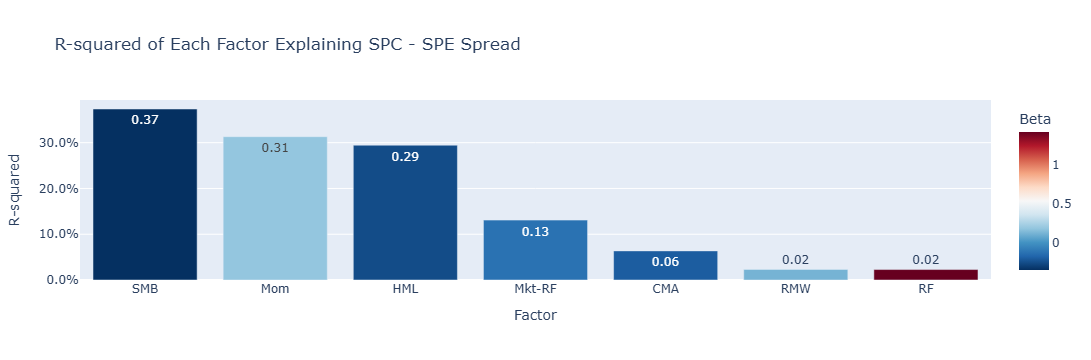

In [33]:
fig = px.bar(
    reg_summary,
    x="Factor",
    y="R_squared",
    color="Beta",  
    color_continuous_scale="RdBu_r", 
    text_auto=".2f",
    hover_data={
        "Alpha": ':.4f',
        "Beta": ':.4f',
        "p_alpha": ':.3f',
        "p_beta": ':.3f',
        "R_squared": ':.3f'
    },
    title="R-squared of Each Factor Explaining SPC - SPE Spread"
)

fig.update_layout(
    xaxis_title="Factor",
    yaxis_title="R-squared",
    yaxis=dict(tickformat=".1%"),
    coloraxis_colorbar_title="Beta",
    hovermode="x unified"
)

fig.show()

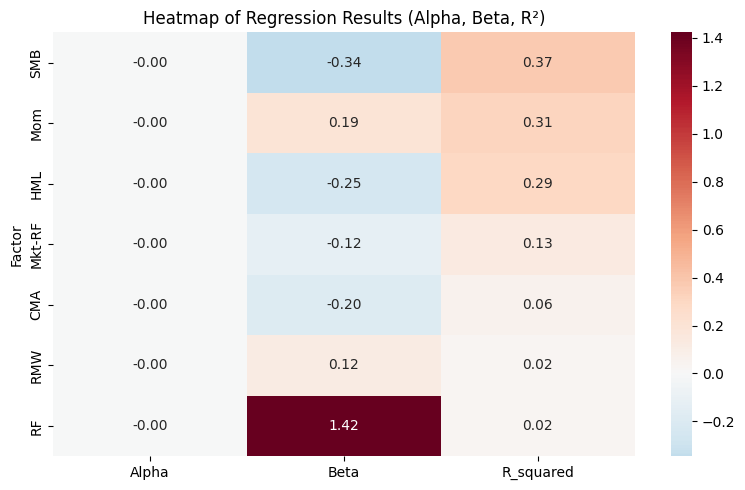

In [34]:
heatmap_data = reg_summary.set_index("Factor")[["Alpha", "Beta", "R_squared"]]

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="RdBu_r", center=0, fmt=".2f")
plt.title("Heatmap of Regression Results (Alpha, Beta, R²)")
plt.tight_layout()
plt.show()

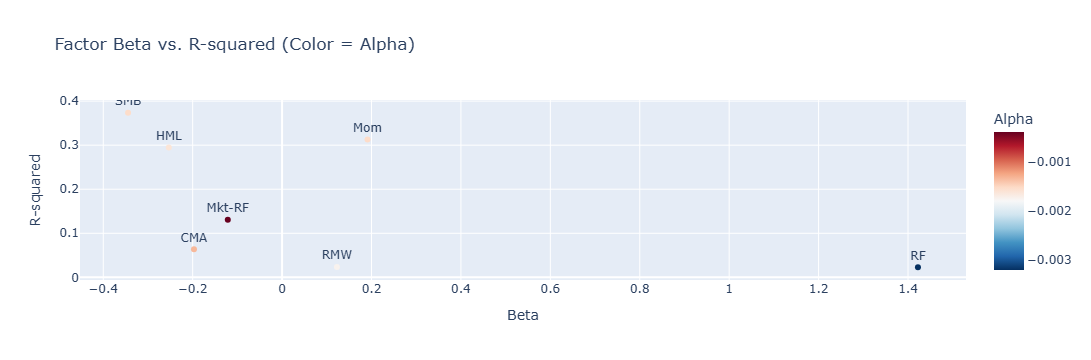

In [35]:
fig = px.scatter(
    reg_summary,
    x="Beta",
    y="R_squared",
    color="Alpha",
    text="Factor",
    color_continuous_scale="RdBu_r",
    title="Factor Beta vs. R-squared (Color = Alpha)",
    hover_data=["Factor", "Alpha", "Beta", "R_squared"]
)
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title="Beta", yaxis_title="R-squared")
fig.show()

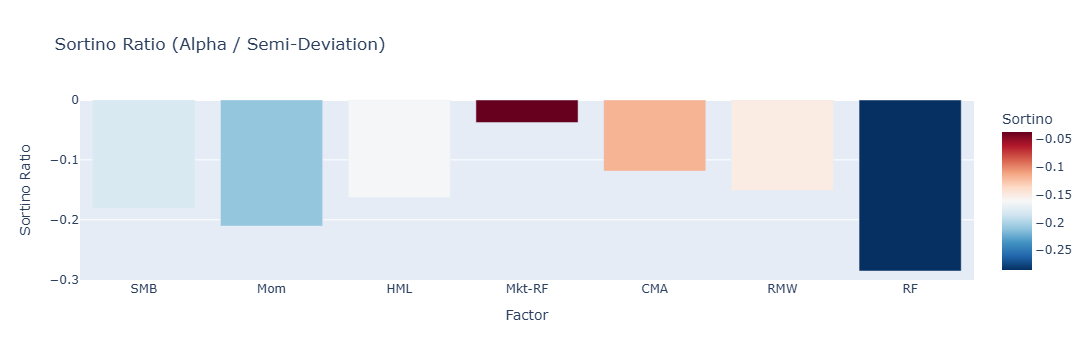

In [36]:
fig_bar = px.bar(
    reg_summary,
    x="Factor",
    y="Sortino_Ratio",
    color="Sortino_Ratio",
    color_continuous_scale="RdBu_r",
    title="Sortino Ratio (Alpha / Semi-Deviation)"
)
fig_bar.update_layout(yaxis_title="Sortino Ratio", coloraxis_colorbar_title="Sortino")
fig_bar.show()


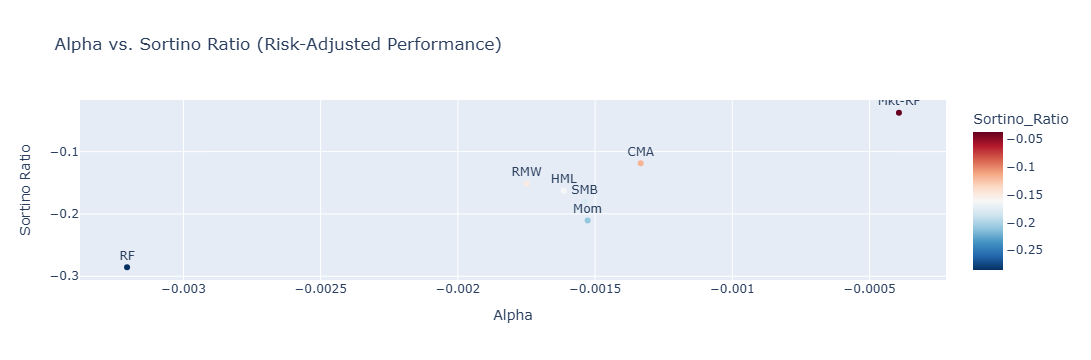

In [37]:
fig_scatter = px.scatter(
    reg_summary,
    x="Alpha",
    y="Sortino_Ratio",
    text="Factor",
    color="Sortino_Ratio",
    color_continuous_scale="RdBu_r",
    title="Alpha vs. Sortino Ratio (Risk-Adjusted Performance)",
    hover_data=["Beta", "R_squared", "Semi_Deviation"]
)
fig_scatter.update_traces(textposition='top center')
fig_scatter.update_layout(xaxis_title="Alpha", yaxis_title="Sortino Ratio")
fig_scatter.show()
